In [2]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import os
from pdf2image import convert_from_path
import tempfile

In [3]:
%matplotlib inline
def sw(im):
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

In [54]:
image_path = '..\\data\\dev\\1n.jpg'

In [55]:
im = cv2.imread(image_path, 0)
ret,th = cv2.threshold(im, 225, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((5,5), np.uint8)
th2 = cv2.dilate(th, kernel)

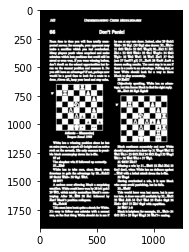

In [6]:
sw(th2)

In [87]:
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 
contours.sort(key=lambda cnt: cv2.contourArea(cnt), reverse=True)
filtered_contours = []
buf = 10
for i, cnt in enumerate(contours):
  area = cv2.contourArea(cnt)
  if not (1000 <= area):
    # print('area', area)
    continue
  epsilon = 0.01*cv2.arcLength(cnt,True)
  approx = cv2.approxPolyDP(cnt,epsilon,True)
  num_sides = len(approx)
  # check for square
  if not (4 == num_sides):
    # print('sides', num_sides)
    continue
  x, y, w, h = cv2.boundingRect(cnt)
  h_max, w_max = im.shape
  if abs(w - h) > 25:
    # print('x,y,w,h', x, y, w, h)
    continue
  potential_board = im[max(y - buf, 0):min(y + h + buf, h_max), max(x - buf, 0):min(x + w + buf, w_max)] 
  pb_th2 = th2[max(y - buf, 0):min(y + h + buf, h_max), max(x - buf, 0):min(x + w + buf, w_max)]
  
  filtered_contours.append(cnt)
#   break

In [88]:
len(filtered_contours)

22

In [91]:
cnt = contours[0]
x, y, w, h = cv2.boundingRect(cnt)
h_max, w_max = im.shape
print(w,h)
potential_board = im[max(y - buf, 0):min(y + h + buf, h_max), max(x - buf, 0):min(x + w + buf, w_max)] 
pb_th2 = th2[max(y - buf, 0):min(y + h + buf, h_max), max(x - buf, 0):min(x + w + buf, w_max)]

410 408


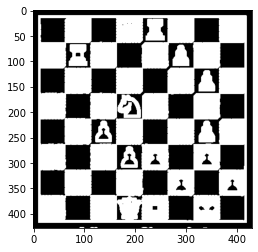

In [92]:
sw(potential_board)
sw(pb_th2)

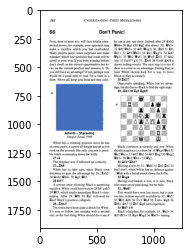

In [59]:
con = cv2.imread(image_path, 1)
for c in filtered_contours:
  color = list(np.random.random(size=3) * 256)
  cv2.drawContours(con, [c], -1, color, -1);
sw(con)

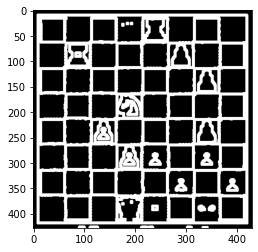

In [96]:
# pb_th3 = np.zeros((100, 100), dtype=np.uint8)
# pb_th3[25:75, 25:75] = 255
# lap = cv2.Laplacian(pb_th2, cv2.CV_64F)
lap = cv2.Laplacian(pb_th2, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
kernel = np.ones((5,5), np.uint8)
lap2 = cv2.dilate(lap, kernel)
sw(lap2)

51.0 45


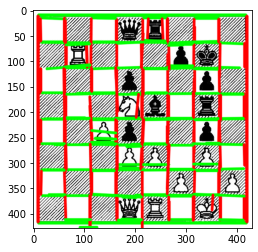

In [108]:
cdstP = cv2.cvtColor(potential_board, cv2.COLOR_GRAY2RGB)
dim = min(w, h) / 8
thres = int(0.9*dim)

linesP = cv2.HoughLinesP(lap, rho=1, theta=np.pi / 180, threshold=thres, lines=None, 
                         minLineLength=thres // 2, maxLineGap=thres // 2)
hls = []
vls = []
if linesP is not None:
    for i in range(0, len(linesP)):
      l = linesP[i][0]
      is_hor = abs(l[0] - l[2]) < 10
      is_vert = abs(l[1] - l[3]) < 10
      if is_hor or is_vert:
        if is_hor:
          color = (0, 0, 255)
          hls.append(l)
        else:
          color = (0, 255, 0)
          vls.append(l)
        
#         color = list(np.random.random(size=3) * 256)
        cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), color, 3, cv2.LINE_AA)
#         cv2.circle(cdstP, (l[0], l[1]), 5, color, -1)
#         cv2.circle(cdstP, (l[2], l[3]), 5, color, -1)
sw(cdstP)
print(dim, thres)
# cv2.imwrite('../data/dev/edge th2 laplacian houghlineP 2.png', cdstP)

In [109]:
len(ls)

193

In [129]:
def find_intersection(line1, line2):
    # extract points
    x1, y1, x2, y2 = line1[0], line1[1], line1[2], line1[3]
    x3, y3, x4, y4 = line2[0], line2[1], line2[2], line2[3]
    # compute determinant
    Px = ((x1*y2 - y1*x2)*(x3-x4) - (x1-x2)*(x3*y4 - y3*x4))/ ((x1-x2)*(y3-y4 - (y1-y2)*(x3-x4)))
    Py = ((x1*y2 - y1*x2)*(y3-y4) - (y1-y2)*(x3*y4 - y3*x4))/ ((x1-x2)*(y3-y4) - (y1-y2)*(x3-x4))
    return Px, Py

In [130]:
lh, lw = lap2.shape
for hl in hls:
  for vl in vls:
    ix, iy = find_intersection(hl, vl)
    if 0 <= ix <= lh and 0 <= iy <= 
    break

[419 416 419  11]
(inf, 9.0)
[420 416 420  11]
(inf, 9.0)
[ 10 416  10  11]
(inf, 9.0)
[  9 416   9  11]
(inf, 9.0)
[365  63 365  16]
(inf, 9.0)
[263  63 263  15]
(inf, 9.0)
[112 427 112 362]
(inf, 9.0)
[264 274 264  86]
(inf, 9.0)
[164 331 164  18]
(inf, 9.0)
[316 280 316 215]
(inf, 9.0)
[367 412 367 364]
(inf, 9.0)
[317 166 317 114]
(inf, 9.0)
[165 412 165 364]
(inf, 9.0)
[115 363 115 314]
(inf, 9.0)
[114 163 114 115]
(inf, 9.0)
[414 213 414 163]
(inf, 9.0)
[266 212 266 164]
(inf, 9.0)
[ 62 162  62 111]
(inf, 9.0)
[213 211 213 161]
(inf, 9.0)
[315 311 315 236]
(inf, 9.0)
[314 413 314 362]
(inf, 9.0)
[364 364 364 312]
(inf, 9.0)
[215  67 215  16]
(inf, 9.0)
[163  61 163  16]
(inf, 9.0)
[162 364 162 312]
(inf, 9.0)
[ 61 263  61 212]
(inf, 9.0)
[ 14 261  14 215]
(inf, 9.0)
[368 412 368 364]
(inf, 9.0)
[ 15 263  15 215]
(inf, 9.0)
[ 64 212  64 165]
(inf, 9.0)
[ 63 318  63 174]
(inf, 9.0)
[415 212 415 165]
(inf, 9.0)
[317  63 317  32]
(inf, 9.0)
[214 427 214 248]
(inf, 9.0)
[111 427 111 3

<ipython-input-129-1e8c968d0cac>:6: RuntimeWarning: divide by zero encountered in int_scalars
  Px = ((x1*y2 - y1*x2)*(x3-x4) - (x1-x2)*(x3*y4 - y3*x4))/ ((x1-x2)*(y3-y4 - (y1-y2)*(x3-x4)))


In [113]:
hl

array([419, 416, 419,  11], dtype=int32)

In [53]:
w/8, h/8

(13.0, 12.875)

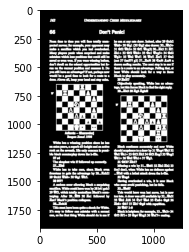

In [62]:
ret,th = cv2.threshold(im, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

kernel = np.ones((5,5), np.uint8)
th2 = cv2.dilate(th, kernel)
sw(th2)

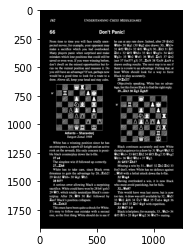

In [42]:
ret,th = cv2.threshold(im, 225, 255, cv2.THRESH_BINARY_INV)
sw(th)